In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [31]:
data = pd.read_csv('iris.csv')

In [68]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
X = data.drop(columns='species')
y = data['species']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [39]:
def knn_classification(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_neighbors_indices = np.argsort(distances)[:k]
        k_neighbors_labels = [y_train[i] for i in k_neighbors_indices]
        most_common_label = max(set(k_neighbors_labels), key=k_neighbors_labels.count)
        y_pred.append(most_common_label)
    return np.array(y_pred)

In [41]:
k = 3
y_pred = knn_classification(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), k)

In [43]:
new_data_point = np.array([5.1, 3.5, 1.4, 0.2])
predicted_class = knn_classification(X_train.to_numpy(), y_train.to_numpy(), [new_data_point], k)[0]
print(f"Predicted class for new data point: {predicted_class}")

Predicted class for new data point: Iris-setosa


In [84]:
def KNN(dataset_path, target_column, k):
    data = pd.read_csv(dataset_path)
    if data[target_column].dtype == 'object':
        le = LabelEncoder()
        data[target_column] = le.fit_transform(data[target_column])
    X = data.drop(columns=target_column)
    y = data[target_column]
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap='Purples', fmt='.2f')
    plt.title(f'Heatmap of {dataset_path}')
    plt.show()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_pred = knn_classification(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), k)
    return X_train, y_train, X_test, y_test, y_pred

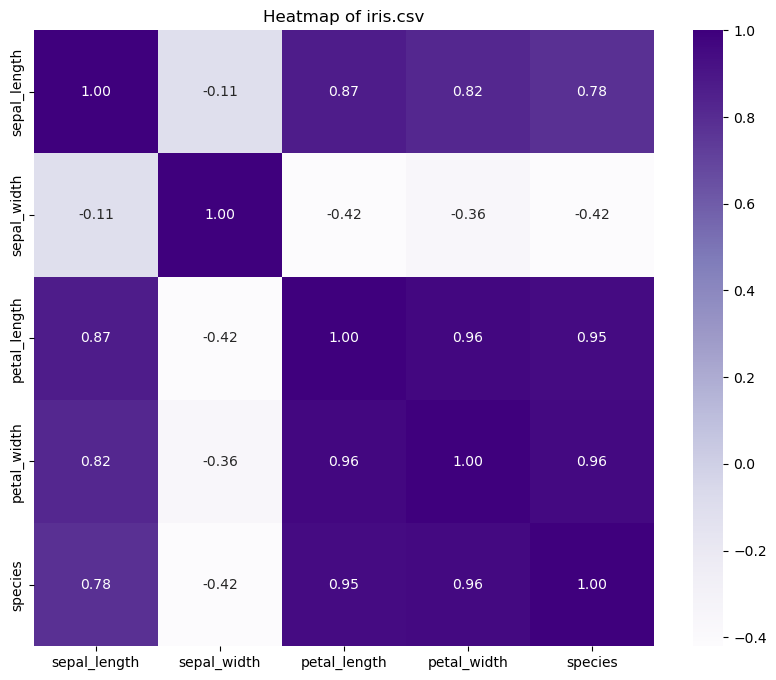

In [86]:
X_train_iris, y_train_iris, X_test_iris, y_test_iris, y_pred_iris = KNN('iris.csv', 'species', k=3)